In [1]:
import pandas as pd
import numpy as np

def simulate(lambda_, mu_, a, b, threshold, price): 
    # lambda_为到达率，mu_为服务率，a、b分别为WTP的上下界，threshold为队列长度阈值，price为价格
    table3=pd.DataFrame(columns=['Interarrival Time','Service Time','Arrival Time','WTP',
                                 'Queue Length','Purchase','Service End Time','Departure Time'])

    # 初始值，不影响最终结果
    table3.loc[0,'Arrival Time']=0
    table3.loc[0,'Queue Length']=0
    table3.loc[0,'Interarrival Time']=np.random.exponential(1/lambda_)
    table3.loc[0,'Service Time']=np.random.exponential(1/mu_)
    table3.loc[0,'WTP']=np.random.uniform(a, b)
    table3.loc[0,'Service End Time']=0
    table3.loc[0,'Purchase']=0
    table3.loc[0,'Departure Time']=0

    # 生成数据
    for i in range(1,701):
        # 已知分布的随机数
        table3.loc[i,'Interarrival Time']=np.random.exponential(1/lambda_)
        table3.loc[i,'Service Time']=np.random.exponential(1/mu_)
        table3.loc[i,'Arrival Time']=table3.loc[i-1,'Arrival Time']+table3.loc[i,'Interarrival Time']
        table3.loc[i,'WTP']=np.random.uniform(a,b)

        # 计算队列长度
        table3.loc[i,'Queue Length']=0 # 初始化队列长度
        for j in range(0, i):
            if table3.loc[j,'Purchase']==1: # 如果前面的顾客购买
                if table3.loc[j,'Departure Time'] > table3.loc[i,'Arrival Time']: # 如果前面的顾客离开时间大于当前顾客到达时间
                    table3.loc[i,'Queue Length']+=1 # 队列长度加1

        # 判断是否购买
        if table3.loc[i,'WTP']>=price and table3.loc[i,'Queue Length']<=threshold:
            table3.loc[i,'Purchase']=1
            for j in range(i-1, 0, -1):
                if table3.loc[j,'Purchase']==1:
                    table3.loc[i,'Service End Time']=max(table3.loc[i,'Arrival Time'],
                                                        table3.loc[j,'Departure Time'])+table3.loc[i,'Service Time'] 
                    # 购买的顾客服务结束时间为到达时间和上一个购买的顾客离开时间的最大值加上服务时间
                    break
            table3.loc[i,'Departure Time']=table3.loc[i,'Service End Time'] # 购买的顾客离开时间为服务结束时间
        else:
            table3.loc[i,'Purchase']=0
            table3.loc[i,'Service Time']=0 # 不购买的顾客服务时间为0
            table3.loc[i,'Service End Time']=table3.loc[i,'Arrival Time'] # 不购买的顾客服务结束时间为到达时间
            table3.loc[i,'Departure Time']=table3.loc[i,'Arrival Time'] # 不购买的顾客离开时间为到达时间

    consumer_count=table3['Purchase'].sum() # 购买的顾客数量（初始值为0，不影响总和）
    total_revenue=price*consumer_count
    average_revenue=total_revenue/700
    return price, consumer_count, total_revenue, average_revenue

In [5]:
results_df = pd.DataFrame(columns=['Price', 'Consumer Count', 'Total Revenue', 'Average Revenue'])
rows = []
for price in np.arange(2.68, 10.72, 0.05):
    price, consumer_count, total_revenue, average_revenue = simulate(0.29, 0.2, 3.46, 10.36, 4, price)
    rows.append({
        'Price': price,
        'Consumer Count': consumer_count,
        'Total Revenue': total_revenue,
        'Average Revenue': average_revenue
    })
results_df = pd.concat([results_df, pd.DataFrame(rows)], ignore_index=True)
results_df

/var/folders/c5/0blph9w901j00fymqh_2qlth0000gn/T/ipykernel_10306/2587941254.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame(rows)], ignore_index=True)


,Price,Consumer Count,Total Revenue,Average Revenue
0,2.68,475,1273.00,1.818571
1,2.73,472,1288.56,1.840800
2,2.78,423,1175.94,1.679914
3,2.83,500,1415.00,2.021429
4,2.88,454,1307.52,1.867886
...,...,...,...,...
156,10.48,0,0.00,0.000000
157,10.53,0,0.00,0.000000
158,10.58,0,0.00,0.000000
159,10.63,0,0.00,0.000000


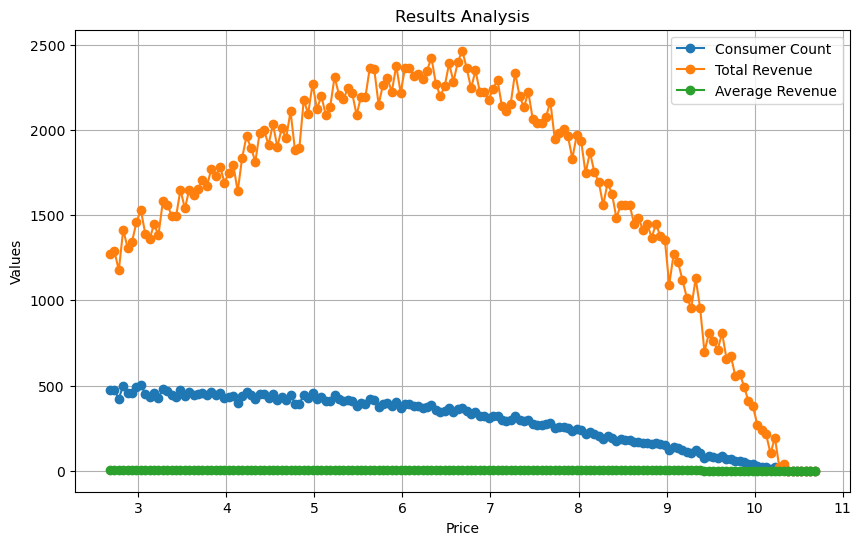

In [6]:
import matplotlib.pyplot as plt

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(results_df['Price'], results_df['Consumer Count'], marker='o', label='Consumer Count')
plt.plot(results_df['Price'], results_df['Total Revenue'], marker='o', label='Total Revenue')
plt.plot(results_df['Price'], results_df['Average Revenue'], marker='o', label='Average Revenue')
# plt.plot(results_df['Price'], results_df['Average Profit'], marker='o', label='Average Profit')

# 添加标题和标签
plt.title('Results Analysis')
plt.xlabel('Price')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()